___

<a href='http://www.pieriandata.com'></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочные задания по классификации текста

### На входе у Вас будет набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные (позитивные и негативные).

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

## Выполните задания, написанные жирным шрифтом!

**Импорт библиотек и загрузка данных из файла в датафрейм pandas.**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('moviereviews.csv')

In [94]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [95]:
df.describe()

,label,review
count,2000,1965
unique,2,1939
top,neg,
freq,1000,27


**Проверка на отсутствующие значения (в т.ч. NaN) в данных.**

In [96]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [97]:
# Удаляем строки (axis=0), в которых хотябы одно значение NaN
df = df.dropna(axis=0)

In [98]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [99]:
df.describe()

,label,review
count,1965,1965
unique,2,1939
top,neg,
freq,983,27


In [100]:
# Удаляем дубликаты
df_unique = df.drop_duplicates()
df.describe()

,label,review
count,1965,1965
unique,2,1939
top,neg,
freq,983,27


**Проверка, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN ("" или "  " или какая-то другая строка из нескольких пробелов).** 
 _полезная ссылка:_  
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html

In [101]:
df['review'].str.isspace()
# False - если в ячейке что-то есть, 
# True - если все символы в строке являются пробельными символами.

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [102]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [103]:
df[df['review'].str.isspace()].value_counts()

label  review
neg              14
pos              13
dtype: int64

In [104]:
df.iloc[57]

label     neg
review       
Name: 57, dtype: object

In [105]:
# Если мы поставим тильду, то получим данные, не содержащие строки,
# в которых все символы в строке являются пробельными символами.
df[-df['review'].str.isspace()].value_counts()

label  review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [106]:
df = df[-df['review'].str.isspace()]

In [107]:
df.describe()

,label,review
count,1938,1938
unique,2,1938
top,neg,how do films like mouse hunt get into theatres...
freq,969,1


In [108]:
# Проверяем, а есть ли совсем пустые строки
df['review'].apply(lambda review:review == "").value_counts()

False    1938
Name: review, dtype: int64

In [109]:
df[df['review'].apply(lambda review:review == "")]

,label,review


То есть, на выходе мы не получили ни одной строки -у нас таких пустых строк нет,
итого - 1938 чистых строк. Чистить нечего.

In [110]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

#### Исследование данных (EDA) для мешка слов (bag of words)
**С помощью модели CountVectorizer найти 20 наиболее часто встречающихся слов (которые не являются стоп-словами в английском языке), отдельно для каждого значения колонки label?**  
https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

### Для df['label']=='neg'

In [112]:
matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])

In [113]:
# !!! Важно сразу результат zip преобразовать в list (особенность работы итератора zip)
freqs_init = list(zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0]))
freqs = freqs_init.copy()
print(freqs)

[('00', 5), ('000', 60), ('007', 3), ('03', 2), ('04', 1), ('05', 2), ('05425', 1), ('10', 167), ('100', 39), ('1000', 7), ('100m', 3), ('101', 16), ('102', 10), ('103', 3), ('104', 1), ('105', 4), ('106', 3), ('107', 3), ('108', 2), ('10b', 1), ('10s', 1), ('10th', 2), ('11', 17), ('110', 1), ('113', 2), ('114', 1), ('115', 4), ('117', 1), ('11th', 2), ('12', 28), ('123', 1), ('125', 1), ('126', 2), ('127', 1), ('128', 1), ('129', 2), ('13', 42), ('130', 1), ('131', 1), ('132', 2), ('133', 1), ('137', 7), ('138', 1), ('13th', 28), ('14', 10), ('140', 1), ('1400', 1), ('15', 32), ('150', 1), ('1521', 1), ('157', 1), ('15th', 2), ('16', 11), ('1600', 6), ('1600s', 1), ('161', 1), ('1692', 1), ('16mm', 1), ('16x9', 2), ('17', 18), ('1700s', 1), ('1709', 1), ('172', 1), ('175', 1), ('17th', 5), ('18', 18), ('180', 2), ('1800s', 2), ('1812', 1), ('1865', 1), ('1869', 2), ('1871', 3), ('1885', 1), ('189', 1), ('1896', 1), ('1898', 1), ('18s', 1), ('18th', 3), ('19', 7), ('1900', 21), ('1900

In [114]:
print(f'{count_vect.get_feature_names_out()}') 
print(f'к-во - {len(count_vect.get_feature_names_out())}') 
print('_'*70)
print(f'{matrix.sum(axis=0).tolist()[0]}') 
print(f'к-во - {len(matrix.sum(axis=0).tolist()[0])}') 

['00' '000' '007' ... 'zwick' 'zwigoff' 'zzzzzzz']
к-во - 27473
______________________________________________________________________
[5, 60, 3, 2, 1, 2, 1, 167, 39, 7, 3, 16, 10, 3, 1, 4, 3, 3, 2, 1, 1, 2, 17, 1, 2, 1, 4, 1, 2, 28, 1, 1, 2, 1, 1, 2, 42, 1, 1, 2, 1, 7, 1, 28, 10, 1, 1, 32, 1, 1, 1, 2, 11, 6, 1, 1, 1, 1, 2, 18, 1, 1, 1, 1, 5, 18, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 7, 21, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 1, 3, 3, 3, 3, 5, 1, 1, 3, 1, 3, 7, 8, 5, 1, 4, 4, 1, 6, 3, 11, 3, 5, 11, 7, 4, 5, 5, 1, 7, 5, 9, 4, 11, 14, 17, 9, 6, 14, 14, 7, 7, 13, 12, 5, 10, 8, 13, 24, 21, 37, 34, 45, 54, 1, 48, 6, 1, 50, 21, 23, 29, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 13, 2, 5, 4, 1, 7, 1, 5, 1, 1, 1, 8, 1, 12, 1, 2, 2, 1, 2, 2, 9, 1, 5, 1, 1, 2, 1, 35, 3, 18, 1, 1, 1, 3, 6, 1, 2, 2, 1, 9, 3, 1, 2, 6, 1, 2, 21, 5, 1, 1, 3, 1, 7, 4, 4, 1, 1, 1, 5, 25, 5, 2, 2, 1, 1, 6, 1, 2, 1, 1, 2, 35, 1, 1, 3, 1, 1, 1, 1, 25, 2, 2, 2, 12, 1, 2, 1, 1, 7, 1, 24, 2, 1, 1, 19, 1, 1, 6, 2, 1, 2, 1,

с помощью **zip** соединяем два списка методом итерирования:
1. count_vect.get_feature_names()
2. matrix.sum(axis=0).tolist()[0]  
**matrix.sum(axis=0).tolist()** - это будет не список, как можно было бы ожидать, а "список списков". Это можно увидеть по двойной паре квадратных скобок. Это следствие того, что matrix.sum(axis=0) возвращает матрицу. Поэтому нужно добавить [0] для того, чтобы из "списка списков" взять только первый (с нулевым индексом) список. 

In [115]:
# # sort from largest to smallest ("-" befor x) and giv 
# only 20 largest values
print(sorted(freqs, key=lambda x: -x[1])[:20])
print(len(sorted(freqs, key=lambda x: -x[1])[:20]))

# print(sorted(freqs))

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]
20


### Для df['label']=='pos'


аналогично ...

### Данные и обучение модели

**Разделение данных на признаки X и целевую переменную y, разбиение на обучающий и тестовый наборы данных**

In [116]:
X = df['review']
y= df['label']

In [117]:
X.head()

0    how do films like mouse hunt get into theatres...
1    some talented actresses are blessed with a dem...
2    this has been an extraordinary year for austra...
3    according to hollywood movies made in last few...
4    my first press screening of 1998 and already i...
Name: review, dtype: object

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Обучение разных моделей используя пайплан и поиск по сетке.

### <u>Пайплайн.</u>   
1. Экспорт

__from sklearn.pipeline import Pipeline__  
__from sklearn.feature_extraction.text import TfidfVectorizer__
__from sklearn.svm import LinearSVC__  

где _TfidfVectorizer_ нужен для векторизации признаков (перевод категориальных признаков в цифровые значения)

2. Далее мы соединяем 2 процедуры: векторизацию и обучение.

__pipe_svc = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])__  

3. Oбучаем

__pipe_svc.fit(X_train, y_train)__

### !!! В процедуре пайплайн мы не преобразовываем признаки!!!, они векторизуются в рамках процесса __Pipeline__

4. Проверяем

__from sklearn.metrics import ConfusionMatrixDisplay,classification_report__  

__preds = pipe_svc.predict(X_test)__  
__print(classification_report(y_test,preds))__  
__ConfusionMatrixDisplay.from_estimator(pipe_svc,X_test,y_test)__  

### <u>Поиск по сетке.</u>

1. Экспорт  

__from sklearn.feature_extraction.text import TfidfVectorizer__
__from sklearn.svm import SVC__
__from sklearn.model_selection import GridSearchCV__

2. Векторизуем признаки сами  

__tfidf = TfidfVectorizer(stop_words='english')__

__tfidf.fit(X_train)__

__X_train_tfidf = tfidf.transform(X_train)__  
__X_test_tfidf = tfidf.transform(X_test)__

3. Присваиваем модель переменной

__svc_model = SVC()__

4. Задаем список гиперпараметров

__param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}__

5. Передаем их в модель поиска оптимальной модели.

__grid_model = GridSearchCV(svc_model,param_grid)__

6. Обучаем уже эту модель

__grid_model.fit(X_train_tfidf, y_train)__

7. Посмотрим на оптимальные параметры

__grid.best_score___  
__grid.best_params___

8. Проверяем

__preds_scv = grid.predict(X_test_tfidf)__
__print(classification_report(y_test,preds_scv))__
__ConfusionMatrixDisplay.from_estimator(grid,X_test_tfidf,y_test)__


!!!! Заметим, что мы никак не преобразовывали категориальный признак "y"!!!!
_____________

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(stop_words='english')
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [121]:
pipe_svc = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [122]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Оценка ошибок: отчёт "classification report" и матрица ошибок.**

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [124]:
preds = pipe_svc.predict(X_test)

In [126]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



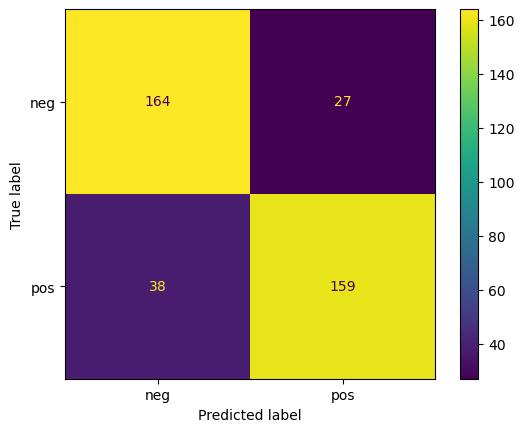

In [127]:
ConfusionMatrixDisplay.from_estimator(pipe_svc,X_test,y_test)

## Поиск по сетке

In [140]:
# Вместо LinearSVC используем SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [141]:
tfidf = TfidfVectorizer(stop_words='english')

In [142]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [143]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [144]:
X_train_tfidf

<1550x35075 sparse matrix of type '<class 'numpy.float64'>'
	with 374673 stored elements in Compressed Sparse Row format>

In [137]:
svc_model = SVC()

In [145]:
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svc_model,param_grid)

In [146]:
grid.fit(X_train_tfidf, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [147]:
grid.best_score_

0.8374193548387098

In [148]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [149]:
preds_scv = grid.predict(X_test_tfidf)


In [151]:
print(classification_report(y_test,preds_scv))

              precision    recall  f1-score   support

         neg       0.80      0.83      0.81       191
         pos       0.83      0.80      0.81       197

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.81      0.81      0.81       388



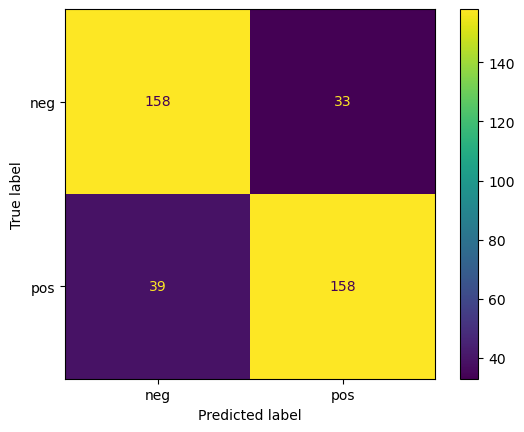

In [153]:
ConfusionMatrixDisplay.from_estimator(grid,X_test_tfidf,y_test)

## А что с логистической регрессией?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# from sklearn. import MultinomialNB

In [157]:
pipe_log = Pipeline([('tfidf', TfidfVectorizer()),('log', LogisticRegression(max_iter=1000)),])

In [158]:
pipe_log.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(max_iter=1000))])

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [160]:
preds_log = pipe_log.predict(X_test)

In [161]:
print(classification_report(y_test,preds_log))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



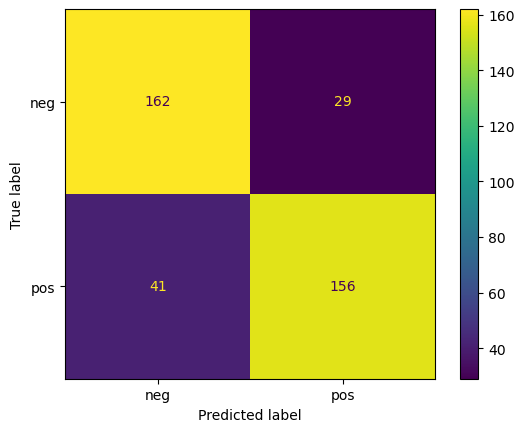

In [162]:
ConfusionMatrixDisplay.from_estimator(pipe_log,X_test,y_test)

In [89]:
print("NB MODEL")
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_estimator(pipe_svc,X_test,y_test)

NB MODEL
              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



NameError: name 'pipe_svc' is not defined

In [ ]:
print("Logistic Regression")
report(log)

In [178]:
print('SVC')
report(svc)

SVC


NotFittedError: This LinearSVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
pipe_log = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])

In [ ]:
pipe_log.fit(X_train, y_train)

In [ ]:
pipe_svc = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [ ]:
pipe_svc.fit(X_train, y_train)